# Распределение Рэлэя

In [1]:
#импортируем библиотеки, которые нам пригодятся
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import rayleigh
from scipy.stats import norm

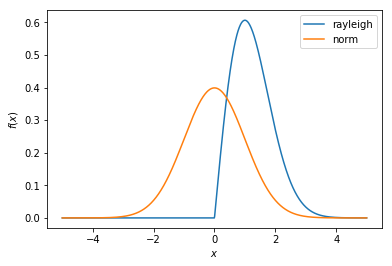

In [2]:
#в этом блоке кода показано отличие нормального распределения (norm) от распределения Рэлэя (rayleigh)
x = np.linspace(-5,5,1000)

outputR = rayleigh.pdf(x)
plt.plot(x, outputR, label='rayleigh')

y = sts.norm.pdf(x)
plt.plot(x, y, label='norm')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

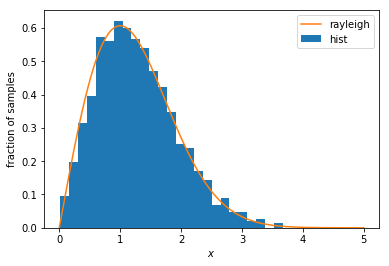

In [3]:
# согласно заданию необходимо: 
# сгенерировать выборку объёма 1000 выбранного распределения, 
# построить гистограмму выборки и нарисовать поверх неё теоретическую плотность распределения


randSample = rayleigh.rvs(size=1000) # генерация выборки 
plt.hist(randSample, density=True, bins=25, label='hist') #построение гистограммы

x = np.linspace(0,5,1000)
output = rayleigh.pdf(x)
plt.plot(x, output, label='rayleigh') #построение теоретической плотности

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()
plt.show() 

In [4]:
# по заданию необходимо:
# сгенерировать выборки объемом 1000 для разных значений n и построить гистограммы распределений их выборочных средних
# создадим функцию, она получает значение n, то есть объем выборки
# и возвращает список, в котором содержатся средние значения сгенерированных выборок
# этот список будет использован для построения гистограммы

def makeSample(n):
    vSrednee = []
    for k in range(1000):
        sampleK = rayleigh.rvs(size=n) #генерация выборки объема n
        vSrednee.append(sum(sampleK)/n) #расчет среднего значения этой выборки и добавление этого значения в список
    return vSrednee

## Для распределения Рэлэя:
Значение мат. ожидания расчитывается по формуле: $$\sqrt{\pi/2}*\sigma$$
Значение дисперсии расчитывается по формуле: $$(2 - \pi/2)*\sigma^2$$

In [5]:
# мат.ожидание (EX)
mu = np.sqrt(np.pi/2)*1
print(mu)
# умножается на 1, т.к. базовое значение $\sigma$ = 1

1.2533141373155001


Согласно Ц.П.Т. выборочное среднее можно приблизить нормальным распределением со средним значением, которое совпадает с математическим ожиданием исходной случайной величины и с дисперсией, которая равна дисперсии исходной случайной величины, поделенной на n.
Т.е. $\mu = EX$, а $\sigma^2 = DX/n$
Однако, при построении графиков используется стандартное отклонение, следовательно
$\sigma = \sqrt{DX/n}$

In [6]:
# стандартное отклонение sqrt(DX/n)
# т.к. объем выборок будет разным, создадим функцию, которая будет вычислять значение ст.отклонения

def stOtkl(n):
    return np.sqrt((2 - np.pi/2)*1**2 / n)

# умножается на 1, т.к. базовое значение $\sigma$ = 1

In [7]:
# Согласно заданию необходимо:
# построить гистограммы полученных выборок
# поверх гистограмм нарисовать плотность соответствующего нормального распределения

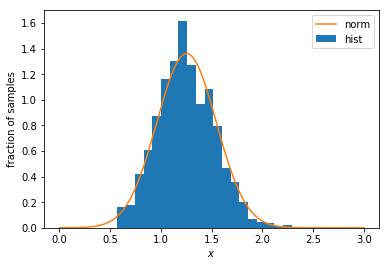

In [8]:
#для выборки 5
n = 5
otkl = stOtkl(n)

arrHist = makeSample(n)
plt.hist(arrHist, density=True, bins=20, label='hist')
# т.к. программа писалась на python 3, вместо 'normed=True', используется 'density=True'

x = np.linspace(0,3,1000) 
y = sts.norm.pdf(x, loc=mu, scale=otkl)
plt.plot(x, y, label='norm')

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()
plt.show() 

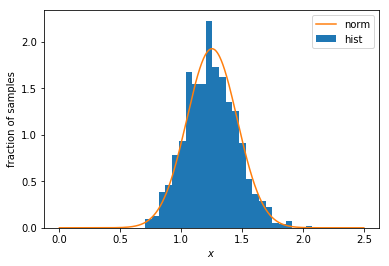

In [9]:
#для выборки 10
n = 10
otkl = stOtkl(n)

arrHist = makeSample(n)
plt.hist(arrHist, density=True, bins=25, label='hist')

x = np.linspace(0,2.5,1000) 
y = sts.norm.pdf(x, loc=mu, scale=otkl)
plt.plot(x, y, label='norm')

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()
plt.show() 

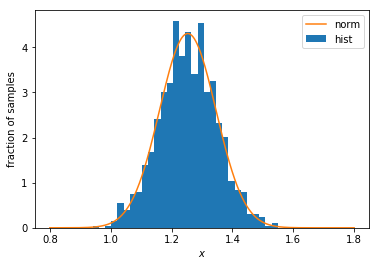

In [10]:
#для выборки 50
n = 50
otkl = stOtkl(n)

arrHist = makeSample(n)
plt.hist(arrHist, density=True, bins=30, label='hist')

x = np.linspace(0.8,1.8,1000) 
y = sts.norm.pdf(x, loc=mu, scale=otkl)
plt.plot(x, y, label='norm')

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()
plt.show() 

При увелечении значения n уменьшается разброс значений выборочного среднего.

Например, при n=5 выборочное среднее принимало значения приблизително от 0.5 до 2.0,

а при n=50 - значения приблизительно от 1.0 до 1.5.

Также при увелечении значения n увеличивается значение 'fraction of samples' в области $\mu$


Т.е. гистограмма значений выборочного среднего сжимается по оси $x$ и растягивается по оси $y$(или'fraction of samples')

## Вывод
При увелечении значения n точность аппроксимации распределения выборочных средних нормальным увеличивается.